## 交叉验证和网格搜索

In [2]:
import pandas as pd
df = pd.read_csv("/Users/xiyiyan/Desktop/上分培训/credit.csv")

In [3]:
object_dummies = pd.get_dummies(df[["SEX", "EDUCATION", "MARRIAGE"]])
df.drop(columns = ["SEX", "EDUCATION", "MARRIAGE"], inplace = True)
df = pd.concat([df, object_dummies], axis = 1)

In [5]:
df.drop('ID',axis=1,inplace=True)

In [6]:
df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,default.payment.next.month,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,1,1,0,0,0,0,1,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,1,1,0,0,0,0,1,0,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,1,0,0,0,0,1,0,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,1,0,0,0,0,1,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,0,1,0,0,0,1,1,0,0


In [7]:
x = df.drop("default.payment.next.month",axis=1)
y = df["default.payment.next.month"]  # 分别取出特征和标签

In [77]:
# 以逻辑回归为例，作模型评估
from sklearn.linear_model import LogisticRegression 
reg = LogisticRegression(max_iter=1000) #实例化

In [78]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, x, y, cv=5)  # 5是默认值 

In [79]:
scores 

array([0.779     , 0.77883333, 0.77883333, 0.77883333, 0.77883333])

In [80]:
scores.mean()

0.7788666666666668

In [81]:
# 模型选择，先生成网格
n_est = [100,200]
min_sample_leaf = [1,2]

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,random_state=1912)

In [83]:
###直接用GridSearchCV自动进行网格搜索###
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[100,200],
              "min_samples_leaf":[1,2]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1912), param_grid,cv=5) #将GridSearchCV类实例化

In [84]:
grid_fit = grid_search.fit(Xtrain, Ytrain) 

In [85]:
print("Best parameters: {}".format(grid_fit.best_estimator_)) # 查看最佳参数组合
print("Best cross validation score: {}".format(grid_fit.best_score_)) # 最佳参数组合下训练集的精度。搜索了最佳参数，还会用最佳参数自动在整个训练集上重新拟合一个模型
print("Test set score: {}".format(grid_fit.score(Xtest, Ytest))) # 测试集准确率

Best parameters: RandomForestClassifier(min_samples_leaf=2, n_estimators=200, random_state=1912)
Best cross validation score: 0.8191111111111111
Test set score: 0.8244


In [86]:
pd.DataFrame(grid_fit.cv_results_) #保存了所有搜索的内容

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.996013,0.088794,0.085006,0.000557,1,100,"{'min_samples_leaf': 1, 'n_estimators': 100}",0.816889,0.816000,0.819333,0.826000,0.813556,0.818356,0.004246,2
1,7.894284,0.046828,0.168898,0.001258,1,200,"{'min_samples_leaf': 1, 'n_estimators': 200}",0.816444,0.816000,0.817556,0.824444,0.812222,0.817333,0.003983,4
2,3.749601,0.039636,0.080619,0.002263,2,100,"{'min_samples_leaf': 2, 'n_estimators': 100}",0.819333,0.815556,0.818667,0.824222,0.813556,0.818267,0.003642,3
3,7.520388,0.060089,0.158175,0.002226,2,200,"{'min_samples_leaf': 2, 'n_estimators': 200}",0.818000,0.816444,0.821111,0.825111,0.814889,0.819111,0.003638,1


## 分类模型评估指标

In [87]:
rf = RandomForestClassifier(random_state=1912)
rf_model = rf.fit(Xtrain, Ytrain)
rf_model.score(Xtest,Ytest) # 准确率

0.8230666666666666

In [88]:
from sklearn import metrics 
pred = rf_model.predict(Xtest)
metrics.f1_score(Ytest,pred)  #recall_score, precision_score, accuracy_score,confusion matrix

0.47652859960552274

In [89]:
conf_mat = metrics.confusion_matrix(Ytest, pred)
conf_mat

array([[5569,  290],
       [1037,  604]])

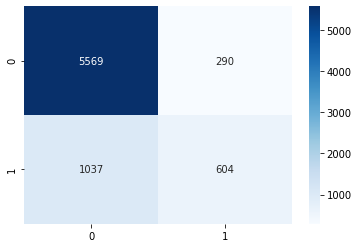

In [90]:
import seaborn as sns
sns.heatmap(conf_mat,annot=True,fmt=".20g", cmap="Blues")

In [91]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, pred,
                            target_names=["Not default","default"]))

              precision    recall  f1-score   support

 Not default       0.84      0.95      0.89      5859
     default       0.68      0.37      0.48      1641

    accuracy                           0.82      7500
   macro avg       0.76      0.66      0.69      7500
weighted avg       0.81      0.82      0.80      7500



In [92]:
# ROC和AUC
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score

In [93]:
pred_prob_rf = rf_model.predict_proba(Xtest) # 第一列表示样本被预测为0的概率，第二列表示样本被预测为1的概率

In [94]:
fpr, tpr, thresholds = roc_curve(Ytest,pred_prob_rf[:,1])  # ROC

In [95]:
# 随机森林和逻辑回归作为对比
reg = LogisticRegression(max_iter=1000) # 实例化
reg_model = reg.fit(Xtrain,Ytrain)
pred_reg = reg_model.predict(Xtest)

In [96]:
fpr_reg, tpr_reg, thresholds_reg = roc_curve(Ytest,reg_model.predict_proba(Xtest)[:,1])

Text(0, 0.5, 'TPR')

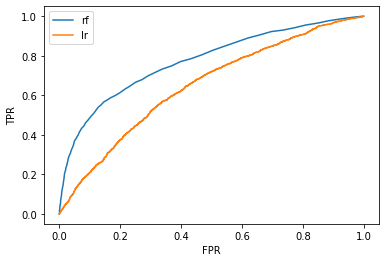

In [97]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="rf")
plt.plot(fpr_reg,tpr_reg,label="lr")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")

In [98]:
# RF的AUC
roc_auc_score(Ytest, rf_model.predict_proba(Xtest)[:,1]) 

0.773583383803352

In [99]:
# LR的AUC
roc_auc_score(Ytest, reg_model.predict_proba(Xtest)[:,1]) 

0.647592795928783

## 回归模型评估指标

In [40]:
from sklearn.datasets import load_diabetes  
diabetes = load_diabetes() 
df_diabetes = pd.DataFrame(diabetes.data,columns = diabetes.feature_names)
df_diabetes

In [41]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [50]:
Xtrain,Xtest,Ytrain,Ytest =  train_test_split(df_diabetes,diabetes.target)

In [51]:
linear_model = linear.fit(Xtrain, Ytrain)

In [60]:
linear_model.coef_

array([ -65.59251618, -240.03477575,  488.08773622,  344.70468601,
       -864.9342979 ,  537.60300656,  125.50731354,  211.34237806,
        649.29769811,  145.66261595])

In [59]:
linear_model.score(Xtest, Ytest)  #返回 R^2

# The coefficient R^2 is defined as (1 - u/v), where u is the residual
# sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
# sum of squares ((y_true - y_true.mean()) ** 2).sum().

0.5884897233594373